### Titanic Dataset -
- Train.csv will contain the details of a subset of the passengers on board (891 to be exact)
and importantly, will reveal whether they survived or not, also known as the “ground truth”.
- The `test.csv` dataset contains similar information but does not disclose the “ground truth” for
each passenger. It’s your job to predict these outcomes.
- Using the patterns you find in the train.csv data, predict whether the other 418 passengers
on board (found in test.csv) survived.
- Link for data -
https://drive.google.com/file/d/1SYJFo2hPCWW3FQGYNEPF4jzr-4pp2JiU/view?usp=sharin
g

### Steps for prediction

- Read the data 
- Data cleaning 
- Treatment of missing values
- Data preprocessing/Data processing
- Model building

 Traing the Data on traing dataset 
 
 Testing the Data on testing dataset

### Reading the data

In [1328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1329]:
train=pd.read_csv('C:\\Users\\pawan\\Desktop\\Untitled Folder\\train.csv')
test=pd.read_csv('C:\\Users\\pawan\\Desktop\\Untitled Folder\\test.csv')

In [1330]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1331]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1332]:
train.shape, test.shape

((891, 12), (418, 11))

In [1333]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1334]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Data treatment

In [1335]:
(train.isnull().sum()/len(train))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [1336]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Treating the missing values

In [1337]:
train['Cabin']=train['Cabin'].fillna("UN")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UN,S


In [1338]:
train['Age'].values

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [1339]:
train['Age'].fillna(train['Age'].median(),inplace=True)

In [1340]:
train['Age'].values

array([22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
       31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
       19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
       28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
       28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
       29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
       38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
       28.  , 24.  ,

In [1341]:
train['Embarked'].fillna(train['Embarked'].mode,inplace=True)

In [1342]:
(train.isnull().sum()/len(train))*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

In [1343]:
(test.isnull().sum()/len(train))*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

In [1344]:
test['Cabin']=test['Cabin'].fillna("UN")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,UN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,UN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,UN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,UN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,UN,S


In [1345]:
test['Age'].fillna(test['Age'].median(),inplace=True)

In [1346]:
(test.isnull().sum()/len(train))*100

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.112233
Cabin          0.000000
Embarked       0.000000
dtype: float64

### Data preprocessing

#### getting dummy values


In [1347]:
train["Cabin"]=train["Cabin"].apply(lambda x: "UNK" if x=="UN" else x[0])

In [1348]:
dummy = pd.get_dummies(train[['Sex','Embarked','Pclass']],drop_first=True)
train1=pd.concat([train,dummy],axis=1)
dummy2=pd.get_dummies(train['Cabin'], prefix='deck')
dummy2.drop(["deck_T"],axis=1,inplace=True)
train1=pd.concat([train1,dummy2],axis=1)
train1=train1.drop(['Sex','Embarked','Pclass','Cabin','Name','Ticket','PassengerId','Parch','SibSp'],axis=1)

In [1349]:
train1.head()

,Survived,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_UNK
0,0,22.0,7.2500,1,0,0,1,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,0,1,0,0,0,0,0
2,1,26.0,7.9250,0,0,0,1,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,0,0,0,1,0,0,1,0,0,0,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,0,0,0,0,0,1


In [1350]:
list(train1.columns)

['Survived',
 'Age',
 'Fare',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'deck_A',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'deck_UNK']

In [1351]:
X_train = train1.drop(['Survived'], axis=1)
X_train.head()
y_train=train1['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Model Building

In [1352]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [1353]:
scalar= StandardScaler()
X_train[['Age','Fare']]=scalar.fit_transform(X_train[['Age','Fare']])

In [1354]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      876
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.25
Date:                Sun, 30 May 2021   Deviance:                       812.49
Time:                        22:16:12   Pearson chi2:                     864.
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1295   3.57e+04   3.16e-05      1.000      -7e+04       7e+04
Age           -0.3291      0.096     -3.441      0.001      -0.516      -0.142
Fare           0.1712      0.117      1.466      0.143      -0.058       0.400
Sex_male      -2.5591      0.187    -13.694      0.000      -2.925      -2.193
Embarked_C   -19.1696   2.05e+04     -0.001      0.999   -4.02e+04    4.01e+04
Embarked_Q   -19.6339   2.05e+04     -0.001      0.999   -4.02e+04    4.01e+04
Embarked_S   -19.7524   2.05e+04     -0.001      0.999   -4.02e+04    4.01e+04
deck_A        20.9169   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
deck_B        20.8204   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
deck_C        20.3209   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
deck_D        21.3032   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
deck_E        21.7065   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
deck_F        20.6960   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
deck_G        18.3174   2.92e+04      0.001      1.000   -5.73e+04    5.73e+04
deck_UNK      19.1729   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
==============================================================================
"""

In [1355]:
train1.shape

(891, 15)

## Feature Selection Using RFE

### Training on Train dataset

In [1356]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 12)    
rfe = rfe.fit(X_train, y_train)

In [1357]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('Fare', True, 1),
 ('Sex_male', True, 1),
 ('Embarked_C', True, 1),
 ('Embarked_Q', False, 2),
 ('Embarked_S', True, 1),
 ('deck_A', True, 1),
 ('deck_B', True, 1),
 ('deck_C', False, 3),
 ('deck_D', True, 1),
 ('deck_E', True, 1),
 ('deck_F', True, 1),
 ('deck_G', True, 1),
 ('deck_UNK', True, 1)]

In [1358]:
col = X_train.columns[rfe.support_]
col

Index(['Age', 'Fare', 'Sex_male', 'Embarked_C', 'Embarked_S', 'deck_A',
       'deck_B', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_UNK'],
      dtype='object')

In [1359]:
X_train.columns[~rfe.support_]

Index(['Embarked_Q', 'deck_C'], dtype='object')

In [1360]:
X_rfe=X_train[col]
X_train_sm = sm.add_constant(X_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      878
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.76
Date:                Sun, 30 May 2021   Deviance:                       813.52
Time:                        22:16:13   Pearson chi2:                     866.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8150      0.465      3.902      0.000       0.903       2.727
Age           -0.3279      0.095     -3.435      0.001      -0.515      -0.141
Fare           0.1740      0.118      1.481      0.139      -0.056       0.404
Sex_male      -2.5655      0.187    -13.731      0.000      -2.932      -2.199
Embarked_C     0.4428      0.359      1.233      0.218      -0.261       1.147
Embarked_S    -0.1404      0.304     -0.462      0.644      -0.735       0.455
deck_A         0.6241      0.648      0.964      0.335      -0.645       1.894
deck_B         0.5646      0.521      1.084      0.278      -0.456       1.585
deck_D         1.0084      0.574      1.756      0.079      -0.117       2.134
deck_E         1.4129      0.584      2.420      0.016       0.269       2.557
deck_F         0.4029      0.762      0.529      0.597      -1.091       1.897
deck_G        -1.9778      1.101     -1.796      0.073      -4.136       0.181
deck_UNK      -1.1230      0.388     -2.897      0.004      -1.883      -0.363
==============================================================================
"""

In [1361]:
X_rfe=X_rfe.drop(['Embarked_S'],axis=1)
X_train_sm = sm.add_constant(X_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.87
Date:                Sun, 30 May 2021   Deviance:                       813.73
Time:                        22:16:13   Pearson chi2:                     865.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6959      0.386      4.391      0.000       0.939       2.453
Age           -0.3278      0.096     -3.431      0.001      -0.515      -0.141
Fare           0.1702      0.117      1.457      0.145      -0.059       0.399
Sex_male      -2.5759      0.186    -13.873      0.000      -2.940      -2.212
Embarked_C     0.5696      0.233      2.448      0.014       0.113       1.026
deck_A         0.6198      0.648      0.957      0.339      -0.649       1.889
deck_B         0.5666      0.520      1.089      0.276      -0.453       1.587
deck_D         1.0011      0.574      1.744      0.081      -0.124       2.126
deck_E         1.4032      0.583      2.406      0.016       0.260       2.546
deck_F         0.4040      0.763      0.529      0.597      -1.092       1.900
deck_G        -2.0004      1.100     -1.818      0.069      -4.157       0.156
deck_UNK      -1.1205      0.387     -2.893      0.004      -1.880      -0.361
==============================================================================
"""

In [1362]:
X_rfe=X_rfe.drop(['deck_F'],axis=1)
X_train_sm = sm.add_constant(X_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -407.01
Date:                Sun, 30 May 2021   Deviance:                       814.01
Time:                        22:16:13   Pearson chi2:                     868.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7906      0.342      5.242      0.000       1.121       2.460
Age           -0.3359      0.094     -3.557      0.000      -0.521      -0.151
Fare           0.1569      0.112      1.397      0.163      -0.063       0.377
Sex_male      -2.5761      0.186    -13.877      0.000      -2.940      -2.212
Embarked_C     0.5618      0.232      2.419      0.016       0.107       1.017
deck_A         0.5373      0.628      0.855      0.392      -0.694       1.769
deck_B         0.4976      0.503      0.989      0.323      -0.488       1.484
deck_D         0.9207      0.553      1.664      0.096      -0.163       2.005
deck_E         1.3180      0.560      2.354      0.019       0.220       2.416
deck_G        -2.1091      1.081     -1.951      0.051      -4.228       0.010
deck_UNK      -1.2189      0.338     -3.604      0.000      -1.882      -0.556
==============================================================================
"""

In [1363]:
X_rfe=X_rfe.drop(['deck_A'],axis=1)
X_train_sm = sm.add_constant(X_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -407.37
Date:                Sun, 30 May 2021   Deviance:                       814.74
Time:                        22:16:14   Pearson chi2:                     870.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9014      0.317      6.005      0.000       1.281       2.522
Age           -0.3297      0.094     -3.498      0.000      -0.514      -0.145
Fare           0.1441      0.110      1.309      0.190      -0.072       0.360
Sex_male      -2.5681      0.185    -13.847      0.000      -2.932      -2.205
Embarked_C     0.5780      0.232      2.496      0.013       0.124       1.032
deck_B         0.3861      0.485      0.796      0.426      -0.564       1.336
deck_D         0.7995      0.534      1.496      0.135      -0.248       1.847
deck_E         1.1952      0.540      2.211      0.027       0.136       2.254
deck_G        -2.2177      1.073     -2.067      0.039      -4.321      -0.114
deck_UNK      -1.3382      0.308     -4.351      0.000      -1.941      -0.735
==============================================================================
"""

In [1364]:
X_rfe=X_rfe.drop(['deck_B'],axis=1)
X_train_sm = sm.add_constant(X_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -407.69
Date:                Sun, 30 May 2021   Deviance:                       815.38
Time:                        22:16:14   Pearson chi2:                     874.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0027      0.290      6.913      0.000       1.435       2.571
Age           -0.3258      0.094     -3.465      0.001      -0.510      -0.142
Fare           0.1550      0.108      1.435      0.151      -0.057       0.367
Sex_male      -2.5729      0.185    -13.889      0.000      -2.936      -2.210
Embarked_C     0.5869      0.231      2.540      0.011       0.134       1.040
deck_D         0.6915      0.517      1.338      0.181      -0.322       1.705
deck_E         1.0928      0.525      2.083      0.037       0.064       2.121
deck_G        -2.3106      1.066     -2.167      0.030      -4.401      -0.221
deck_UNK      -1.4349      0.282     -5.086      0.000      -1.988      -0.882
==============================================================================
"""

In [1365]:
X_rfe=X_rfe.drop(['deck_D'],axis=1)
X_train_sm = sm.add_constant(X_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -408.61
Date:                Sun, 30 May 2021   Deviance:                       817.23
Time:                        22:16:14   Pearson chi2:                     879.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1444      0.270      7.935      0.000       1.615       2.674
Age           -0.3195      0.094     -3.416      0.001      -0.503      -0.136
Fare           0.1399      0.107      1.306      0.191      -0.070       0.350
Sex_male      -2.5804      0.185    -13.949      0.000      -2.943      -2.218
Embarked_C     0.5905      0.230      2.562      0.010       0.139       1.042
deck_E         0.9535      0.514      1.856      0.063      -0.053       1.960
deck_G        -2.4509      1.061     -2.310      0.021      -4.530      -0.372
deck_UNK      -1.5755      0.262     -6.019      0.000      -2.089      -1.063
==============================================================================
"""

In [1366]:
X_rfe=X_rfe.drop(['Embarked_C'],axis=1)
X_train_sm = sm.add_constant(X_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -411.88
Date:                Sun, 30 May 2021   Deviance:                       823.75
Time:                        22:16:14   Pearson chi2:                     884.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3020      0.264      8.733      0.000       1.785       2.819
Age           -0.3194      0.093     -3.440      0.001      -0.501      -0.137
Fare           0.1862      0.106      1.761      0.078      -0.021       0.394
Sex_male      -2.5653      0.183    -13.992      0.000      -2.925      -2.206
deck_E         0.8169      0.506      1.614      0.107      -0.175       1.809
deck_G        -2.5911      1.059     -2.446      0.014      -4.667      -0.515
deck_UNK      -1.6399      0.260     -6.317      0.000      -2.149      -1.131
==============================================================================
"""

In [1367]:
vif = pd.DataFrame()
vif['Features'] =X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,deck_UNK,2.52
2,Sex_male,2.44
0,Age,1.07
1,Fare,1.07
3,deck_E,1.05
4,deck_G,1.01


In [1368]:
col=X_rfe.columns
col

Index(['Age', 'Fare', 'Sex_male', 'deck_E', 'deck_G', 'deck_UNK'], dtype='object')

In [1369]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1370]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_Prob':y_train_pred})
y_train_pred_final['Pass_Id'] = y_train.index
y_train_pred_final.head(10)

,Survived,Survived_Prob,Pass_Id
0,0,0.139919,0
1,1,0.903479,1
2,1,0.657832,2
3,1,0.903955,3
4,0,0.106015,4
5,0,0.123605,5
6,0,0.505618,6
7,0,0.218719,7
8,1,0.655008,8
9,1,0.737162,9


In [1371]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob,Pass_Id,predicted
0,0,0.139919,0,0
1,1,0.903479,1,1
2,1,0.657832,2,1
3,1,0.903955,3,1
4,0,0.106015,4,0


In [1372]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[455  94]
 [ 91 251]]


In [1373]:
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.792368125701459


In [1374]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survived_Prob, drop_intermediate = False )

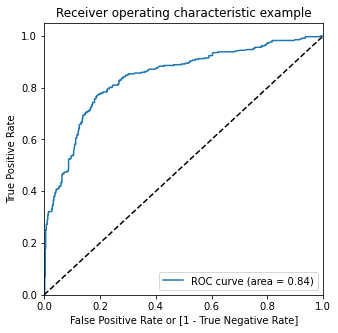

In [1375]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob)

In [1376]:
print ('Accuracy: ', accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))
print ('F1 score: ', f1_score(y_train_pred_final.Survived, y_train_pred_final.predicted))
print ('Recall: ', recall_score(y_train_pred_final.Survived, y_train_pred_final.predicted))
print ('Precision: ', precision_score(y_train_pred_final.Survived, y_train_pred_final.predicted))
print ('ROC_AUC_SCORE: ', roc_auc_score(y_train_pred_final.Survived, y_train_pred_final.predicted))
print ('\n clasification report:\n', classification_report(y_train_pred_final.Survived, y_train_pred_final.predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted))

Accuracy:  0.792368125701459
F1 score:  0.7307132459970889
Recall:  0.7339181286549707
Precision:  0.7275362318840579
ROC_AUC_SCORE:  0.7813488639631866

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       549
           1       0.73      0.73      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891


 confussion matrix:
 [[455  94]
 [ 91 251]]


### Testing on the test dataset

In [1377]:
test["Cabin"]=test["Cabin"].apply(lambda x: "UNK" if x=="UN" else x[0])

In [1378]:
dummy = pd.get_dummies(test[['Sex','Embarked','Pclass']],drop_first=True)
test1=pd.concat([test,dummy],axis=1)
dummy2=pd.get_dummies(test['Cabin'], prefix='deck')
test1=pd.concat([test1,dummy2],axis=1)
test1=test1.drop(['Sex','Embarked','Pclass','Cabin','Name','Ticket','Parch','SibSp'],axis=1)

In [1379]:
test1.head()

,PassengerId,Age,Fare,Sex_male,Embarked_Q,Embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_UNK
0,892,34.5,7.8292,1,1,0,0,0,0,0,0,0,0,1
1,893,47.0,7.0000,0,0,1,0,0,0,0,0,0,0,1
2,894,62.0,9.6875,1,1,0,0,0,0,0,0,0,0,1
3,895,27.0,8.6625,1,0,1,0,0,0,0,0,0,0,1
4,896,22.0,12.2875,0,0,1,0,0,0,0,0,0,0,1


In [1380]:
scalar= StandardScaler()
X_train[['Age','Fare']]=scalar.fit_transform(X_train[['Age','Fare']])

In [1381]:
X_test = test1[col]
X_test.head()

,Age,Fare,Sex_male,deck_E,deck_G,deck_UNK
0,34.5,7.8292,1,0,0,1
1,47.0,7.0000,0,0,0,1
2,62.0,9.6875,1,0,0,1
3,27.0,8.6625,1,0,0,1
4,22.0,12.2875,0,0,0,1


In [1382]:
X_test_sm = sm.add_constant(X_test)

In [1383]:
y_test_pred = res.predict(X_test_sm)

In [1384]:
y_test_pred[:10]

0    1.047974e-05
1    2.153882e-06
2    2.267180e-09
3    1.343327e-04
4    1.666652e-02
5    9.400553e-03
6    5.524885e-04
7    8.093688e-03
8    2.316484e-02
9    1.607241e-02
dtype: float64

In [1385]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [1386]:
y_test_df = pd.DataFrame(y_test)

In [1387]:
y_test_df['Pass_Id'] = y_test_df.index

In [1388]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1389]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1390]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_Prob'})

In [1393]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Pass_Id','Survived_Prob'], axis=1)

In [1394]:
y_pred_final.head()

,Pass_Id,Survived_Prob
0,0,1.047974e-05
1,1,2.153882e-06
2,2,2.267180e-09
3,3,1.343327e-04
4,4,1.666652e-02


In [1396]:
y_pred_final['final_predicted'] = y_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [1397]:
y_pred_final.head()

,Pass_Id,Survived_Prob,final_predicted
0,0,1.047974e-05,0
1,1,2.153882e-06,0
2,2,2.267180e-09,0
3,3,1.343327e-04,0
4,4,1.666652e-02,0


In [1409]:
y_test_pred[:10]

0    1.047974e-05
1    2.153882e-06
2    2.267180e-09
3    1.343327e-04
4    1.666652e-02
5    9.400553e-03
6    5.524885e-04
7    8.093688e-03
8    2.316484e-02
9    1.607241e-02
dtype: float64